###  ニュートンフラクタルの描画

ニュートンフラクタルはニュートン法と呼ばれる方程式の解を求めるアルゴリズムによって生み出されるフラクタル図形です．
ニュートン法は下の漸化式で方程式の解を求めます．

$$\displaystyle
f(x) = 0\ \ となる解\ x\ を求める．\\
x_{n+1} = x_{n} - \frac{f(x_n)}{f'(x_n)}
$$

                                
適当な$x_0$をとった時，$n$が十分な値になるまで計算すると方程式 $f(x)=0$ の解の1つが求まります．
$x_0$はもちろん複素数も含みます．

ニュートンフラクタルは複素平面上の１点を$x_0$としたときに求まる解を色として平面上に入力することにより描かれます．例えば$f(x) = x^3 - 1$だと，$x_0 = 2$ですと解は1に，$x_0 = -1.6+0.9i$なら解は$\frac{-1+\sqrt{3}}{2}$に収束します．この収束した数値ごとに色を塗ると不思議なフラクタル図形が生まれます．

In [1]:
# モジュールのインポート・変数の宣言
%matplotlib nbagg
import matplotlib.animation as ani
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from numba import jit
import numpy as np


SIZE = 300
x = np.linspace(-3, 3, SIZE)
y = np.linspace(-3, 3, SIZE)
c = np.zeros((SIZE, SIZE), dtype = complex)
for i in range(SIZE):
    for j in range(SIZE):
        c[i, j] = x[i] + y[j]*1.0j

In [2]:
# 関数の宣言

# 関数f(x)
@jit('c8[:,:](c8[:,:], f8)')
def f(z, t):
    return z**(3*np.sin(t)) - 1

# 導関数f'(x)
@jit('c8[:,:](c8[:,:], f8)')
def dif(z, t):
    return (3*np.sin(t))*(z**(2*np.sin(t)))

# ニュートン法
@jit('c8[:,:](c8[:,:], f8)')
def newton(x, t):
    for i in range(50):
        x = x - (f(x, t)/dif(x, t))
    return x

# プロット t:角度((deg-1)/2)で入力
@jit('void(i4)')
def plot(t):
    plt.cla()
    t -= 1
    t *= 2
    theta = t * np.pi/180
    Z = newton(c, theta)
    X, Y = np.meshgrid(x, y)
    
    plt.xticks([], ()) # 目盛りを消す
    plt.yticks([], ())
    plt.xlabel(r"$Re$", fontsize=6) # x軸のタイトル
    plt.ylabel(r"$Im$", fontsize=6) # y軸
    plt.tick_params(labelleft='off')#y軸左の数値を消す
    plt.tick_params(labelbottom='off') #x軸下の数値を消す
    plt.title(r"NewtonFractal, " + r" $P(x)=z^{3\sin \theta} - 1$ " + r" $\theta = $" + str(t) + r"$^\circ$", fontsize=8)
    
    plt.contourf(X, Y, np.angle(Z), cmap=cm.pink)
    plt.show()

<IPython.core.display.Javascript object>


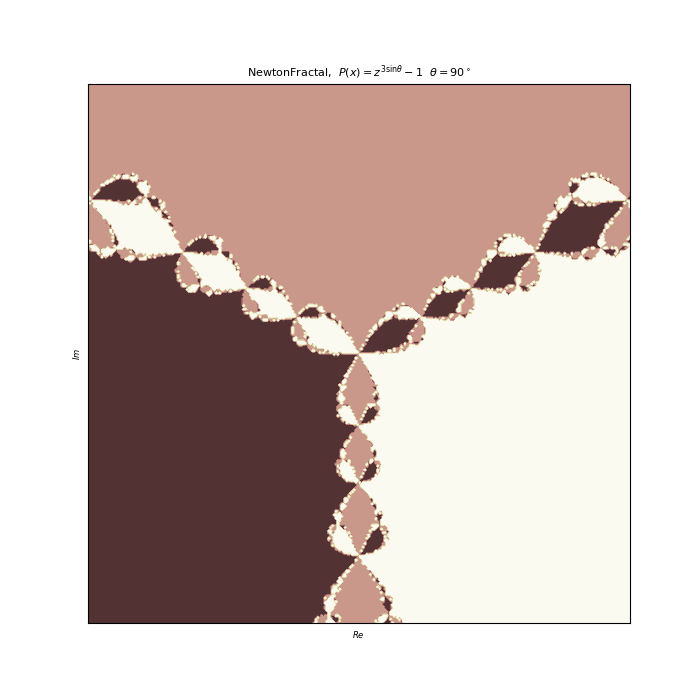

In [3]:
# プロット・GIF作成

fig = plt.figure(figsize=(7, 7))
plot(46) # ((91-1)/2)°

# アニメーション用関数
# anim = ani.FuncAnimation(fig, plot, interval=100, frames=181, repeat=True)